*****🏷️Project Title: Medical Insurance Cost Prediction Using Regression and Forecasting***


**🎯Objective:**

The aim of this project is to analyze and predict the medical insurance charges based on various customer attributes such as:

- Analyze customer health and demographic data.
- Predict medical insurance charges using regression models.
- Visualize how factors like age, BMI, smoking status affect charges.
- Optionally, forecast future charges using time series modeling.

The dataset consists of the following columns:

    *   Age
    *   Gender (Sex)
    *   BMI (Body Mass Index)
    *   Number of Children
    *   Smoking Status
    *   Region

This data is derived from a dataset where each row represents a customer's profile and their corresponding medical insurance charges.

**ℹ️Dataset Overview::**


| Column     | Description                                                 |
| ---------- | ----------------------------------------------------------- |
| `age`      | Age of the individual (in years)                            |
| `sex`      | Gender of the individual (`male`/`female`)                  |
| `bmi`      | Body Mass Index (numerical value)                           |
| `children` | Number of dependent children covered by the insurance       |
| `smoker`   | Whether the person smokes (`yes`/`no`)                      |
| `region`   | Residential area in the US (`northeast`, `southeast`, etc.) |
| `charges`  | Insurance premium billed to the customer (target column)    |


ℹ️ *Project Overview:*

This mini-project leverages a real-world dataset to study the impact of various features like age, sex, BMI, region, and smoking on medical insurance costs. We apply feature engineering, regression modeling, and even forecasting using Prophet.

**Step 1:
Upload and Load the CSV**

In [ ]:
# Import necessary libraries
import pandas as pd

In [ ]:
# Upload the CSV file using the file upload dialog in Colab
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
# Load the uploaded CSV file into a DataFrame
df = pd.read_csv('insurance.csv')  # Upload the CSV in Colab and use correct filename
df.head() # Display first 5 rows of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Step 2: Understand the Data**

In [ ]:
# View basic info about data types, non-null counts, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Get descriptive statistics for numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**Step 3: Clean and Validate Data**

In [ ]:
# Remove duplicates if any present
df = df.drop_duplicates()

In [ ]:
# Validate BMI column: check its minimum and maximum values
print(df['bmi'].min(), df['bmi'].max())

15.96 53.13


In [ ]:
# Validate charges column: check its range
print(df['charges'].min(), df['charges'].max())

1121.8739 63770.42801


In [ ]:
# Fill missing values using forward fill (if they exist)
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-14-891325637.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


**Step 4: Feature Engineering – Add New Useful Columns**

In [ ]:
# Add a new column 'bmi_category' by categorizing BMI values
df['bmi_category'] = pd.cut(df['bmi'],
                            bins=[0, 18.5, 24.9, 29.9, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [ ]:
# Add a new column 'age_group' by segmenting age ranges
df['age_group'] = pd.cut(df['age'],
                         bins=[17, 30, 45, 60, 100],
                         labels=['Young', 'Adult', 'Middle Age', 'Senior'])

In [ ]:
# Convert 'smoker' into binary column: 1 for yes, 0 for no
df['is_smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [ ]:
# Display the updated DataFrame
df

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Young,1
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Young,0
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Young,0
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Adult,0
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Adult,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,Middle Age,0
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,Young,0
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,Young,0
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,Young,0


**Step 5: Encode Categorical Columns**

In [ ]:
# One-hot encode categorical columns and drop the first category to avoid multicollinearity
df = pd.get_dummies(df, columns=['sex', 'region', 'bmi_category', 'age_group'], drop_first=True)


In [ ]:
# Display updated DataFrame with new encoded columns
df

,age,bmi,children,smoker,charges,is_smoker,sex_male,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,age_group_Adult,age_group_Middle Age,age_group_Senior
0,19,27.900,0,yes,16884.92400,1,False,False,False,True,False,True,False,False,False,False
1,18,33.770,1,no,1725.55230,0,True,False,True,False,False,False,True,False,False,False
2,28,33.000,3,no,4449.46200,0,True,False,True,False,False,False,True,False,False,False
3,33,22.705,0,no,21984.47061,0,True,True,False,False,True,False,False,True,False,False
4,32,28.880,0,no,3866.85520,0,True,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,0,True,True,False,False,False,False,True,False,True,False
1334,18,31.920,0,no,2205.98080,0,False,False,False,False,False,False,True,False,False,False
1335,18,36.850,0,no,1629.83350,0,False,False,True,False,False,False,True,False,False,False
1336,21,25.800,0,no,2007.94500,0,False,False,False,True,False,True,False,False,False,False


**Step 6: Visualize Data with Seaborn**

In [ ]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Keep only numerical columns for plotting
numeric_df = df.select_dtypes(include=['int64', 'float64'])

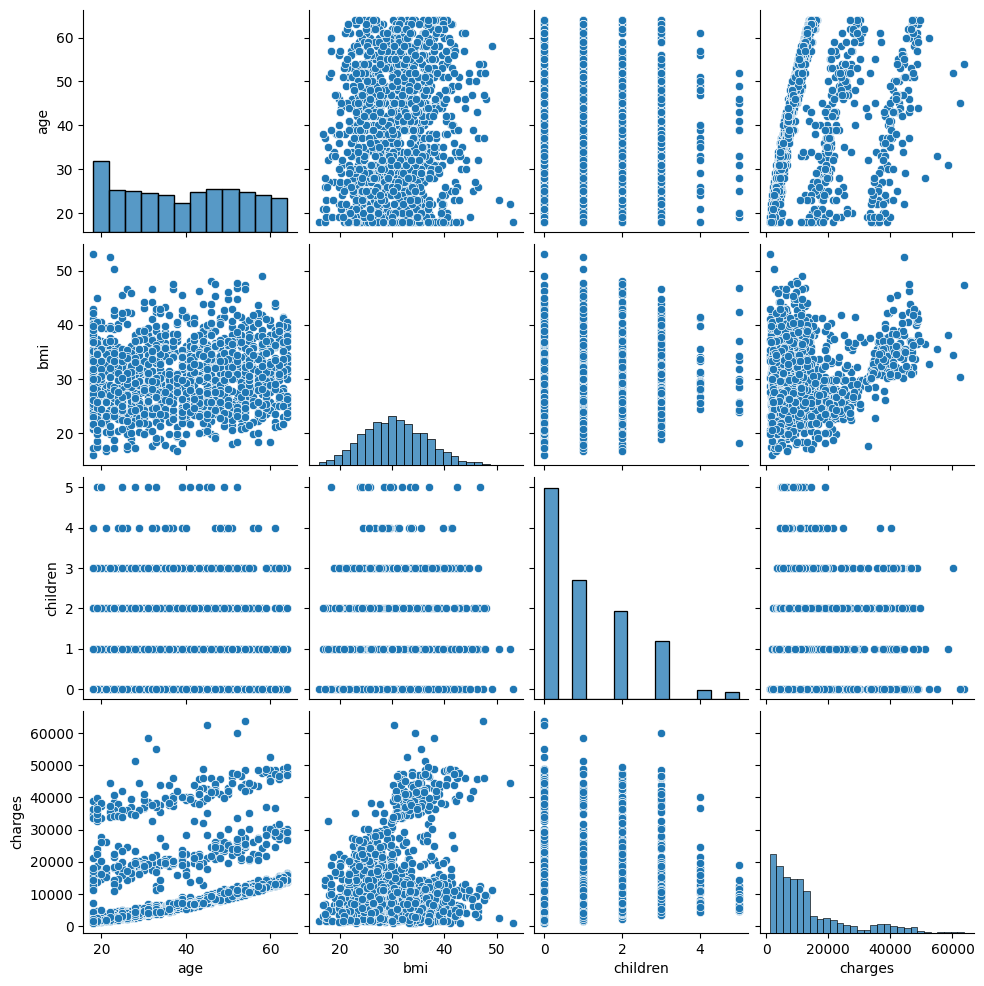

In [ ]:
# Pairplot of selected variables to see relationships
sns.pairplot(df[['age', 'bmi', 'children', 'charges']])
plt.show()

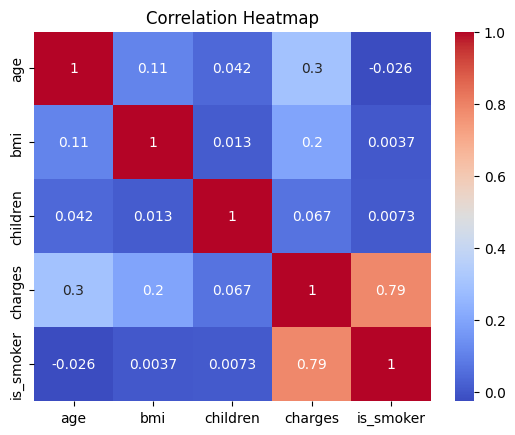

In [ ]:
# Plot a heatmap showing correlation among all numeric variables
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Step 7: Prepare Features and Target for Regression**

In [ ]:
# Drop unnecessary columns: 'charges' is target, 'smoker' was converted to is_smoker
X = df.drop(['charges', 'smoker'], axis=1)

In [ ]:
# Target variable
y = df['charges']

**Step 8: Linear Regression Model**

In [ ]:
# Import necessary modules for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Keep only numeric columns in X (excluding target)
X = df.drop(['charges', 'smoker'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])


In [ ]:
# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Display basic statistics of the charges column
print("Min charges:", df['charges'].min())
print("Max charges:", df['charges'].max())
print("Mean charges:", df['charges'].mean())

Min charges: 1121.8739
Max charges: 63770.42801
Mean charges: 13279.121486655948


In [ ]:
# Predict on the test set and evaluate using Mean Absolute Error
predictions = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))

Mean Absolute Error: 4373.6167397168965


**Step 9: Adding Date for Time Series Forecasting**

In [ ]:
# Import numpy and Prophet
import numpy as np
from prophet import Prophet

In [ ]:
# Create a synthetic 'date' column starting from 2020-01-01
df['date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

**Step 10: Forecasting Charges using Prophet**

In [ ]:
# Prepare dataframe for Prophet model with 'ds' and 'y' columns
df_prophet = df[['date', 'charges']].rename(columns={'date': 'ds', 'charges': 'y'})

In [ ]:
# Initialize and fit Prophet model
m = Prophet()
m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcium4k8n/zs3iz2c0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcium4k8n/_i6rb7vw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74199', 'data', 'file=/tmp/tmpcium4k8n/zs3iz2c0.json', 'init=/tmp/tmpcium4k8n/_i6rb7vw.json', 'output', 'file=/tmp/tmpcium4k8n/prophet_models2uq6eo8/prophet_model-20250719140731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Forecast for next 30 days
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

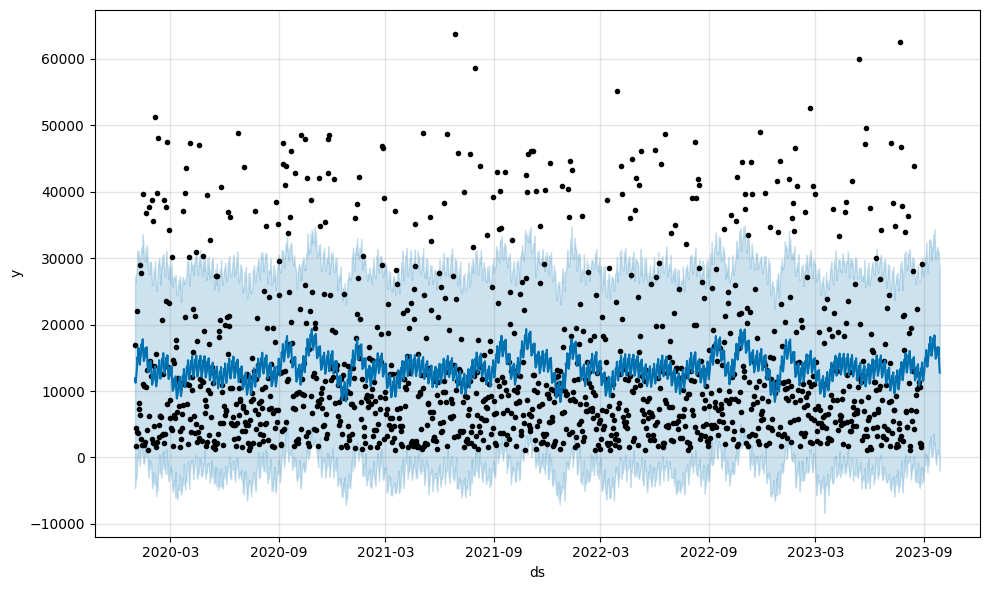

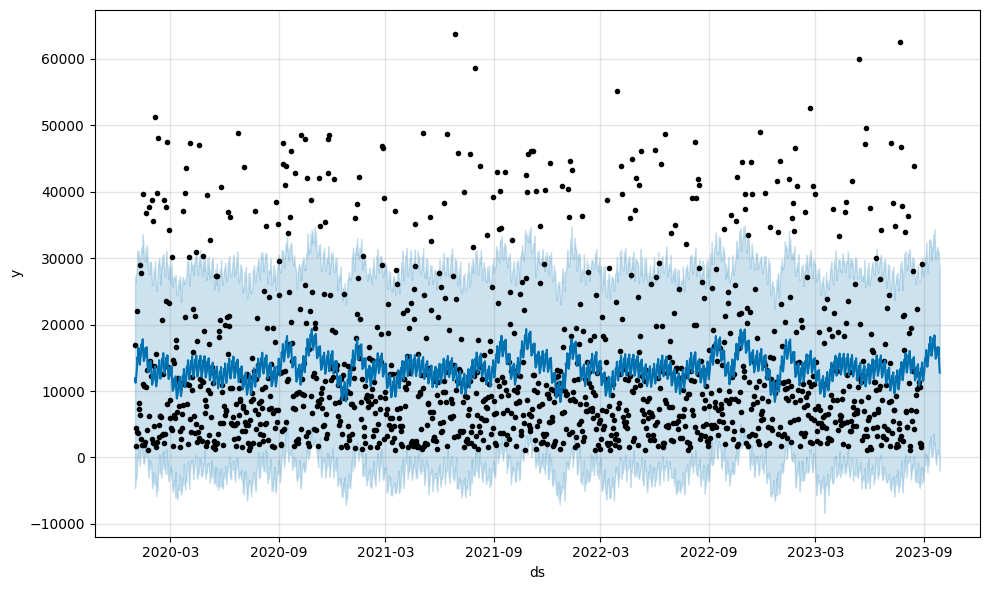

In [ ]:
m.plot(forecast)

In [ ]:
# Prophet returns forecast DataFrame with many columns like yhat, trend, etc.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1362,2023-09-24,16595.222504,1204.464983,31698.284632
1363,2023-09-25,15416.021029,458.741956,30454.122884
1364,2023-09-26,16584.785198,603.813532,31030.853739
1365,2023-09-27,14222.317330,218.039807,29107.705980
1366,2023-09-28,12762.332195,-2031.251334,28338.929762
